# Palmer Penguins Modeling Decision Trees
## Author: David Greco
### 11/14/24

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from palmerpenguins import load_penguins
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
import plotnine as pt

penguins = load_penguins()
penguins.dropna(inplace=True)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict bill_depth_mm. Prepare your data and fit the following models on the entire dataset:

Your best multiple linear regression model from before
Two kNN models (for different values of K)
A decision tree model
Create a plot like the right plot of Fig 1. in our Model Validation chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [3]:
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Best Multiple Linear Regression Model:

In [4]:
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island","species"]),
    ("standardize", StandardScaler(), ["bill_length_mm",  "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_fitted = lr_pipeline.fit(X, y)

y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)

train_mse1 = mean_squared_error(y_train, y_train_pred)
test_mse1 = mean_squared_error(y_test, y_test_pred)
r1 = r2_score(y_test, y_test_pred)

### KNN Model (K=3):

In [11]:
knn_pipeline = Pipeline(steps=[
    ('preprocessing', ct),
    ('knn', KNeighborsRegressor(n_neighbors=3))
])

knn_pipeline.fit(X_train, y_train)

y_train_pred = knn_pipeline.predict(X_train)
y_test_pred = knn_pipeline.predict(X_test)

train_mse2 = mean_squared_error(y_train, y_train_pred)
test_mse2 = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

### KNN Model (K=6):

In [17]:
knn_pipeline = Pipeline(steps=[
    ('preprocessing', ct),
    ('knn', KNeighborsRegressor(n_neighbors=6))
])

knn_pipeline.fit(X_train, y_train)

y_train_pred = knn_pipeline.predict(X_train)
y_test_pred = knn_pipeline.predict(X_test)

train_mse3 = mean_squared_error(y_train, y_train_pred)
test_mse3 = mean_squared_error(y_test, y_test_pred)
r3 = r2_score(y_test, y_test_pred)

### Decision Tree Model

In [18]:
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessing', ct),
    ('decision_tree', DecisionTreeRegressor())
])

decision_tree_pipeline.fit(X_train, y_train)

y_train_pred = decision_tree_pipeline.predict(X_train)
y_test_pred = decision_tree_pipeline.predict(X_test)

train_mse4 = mean_squared_error(y_train, y_train_pred)
test_mse4 = mean_squared_error(y_test, y_test_pred)
r4 = r2_score(y_test, y_test_pred)

decision_tree_model = decision_tree_pipeline.named_steps['decision_tree']
tree_depth = decision_tree_model.get_depth()

In [19]:
fit_results = pd.DataFrame({
    "Model": ["Multiple Regression","KNN (K=3)", "KNN (K=6)", "Decision Tree"],
    "Flexibility": [6,5,10,tree_depth],
    "Train MSE": [train_mse1,train_mse2, train_mse3, train_mse4],
    "Test MSE": [test_mse1,test_mse2, test_mse3, test_mse4],
})

fit_results

,Model,Flexibility,Train MSE,Test MSE
0,Multiple Regression,6,0.632487,0.550075
1,KNN (K=3),5,0.417291,0.840066
2,KNN (K=6),10,0.537631,0.732011
3,Decision Tree,18,0.000000,1.050952


### Graph Creation

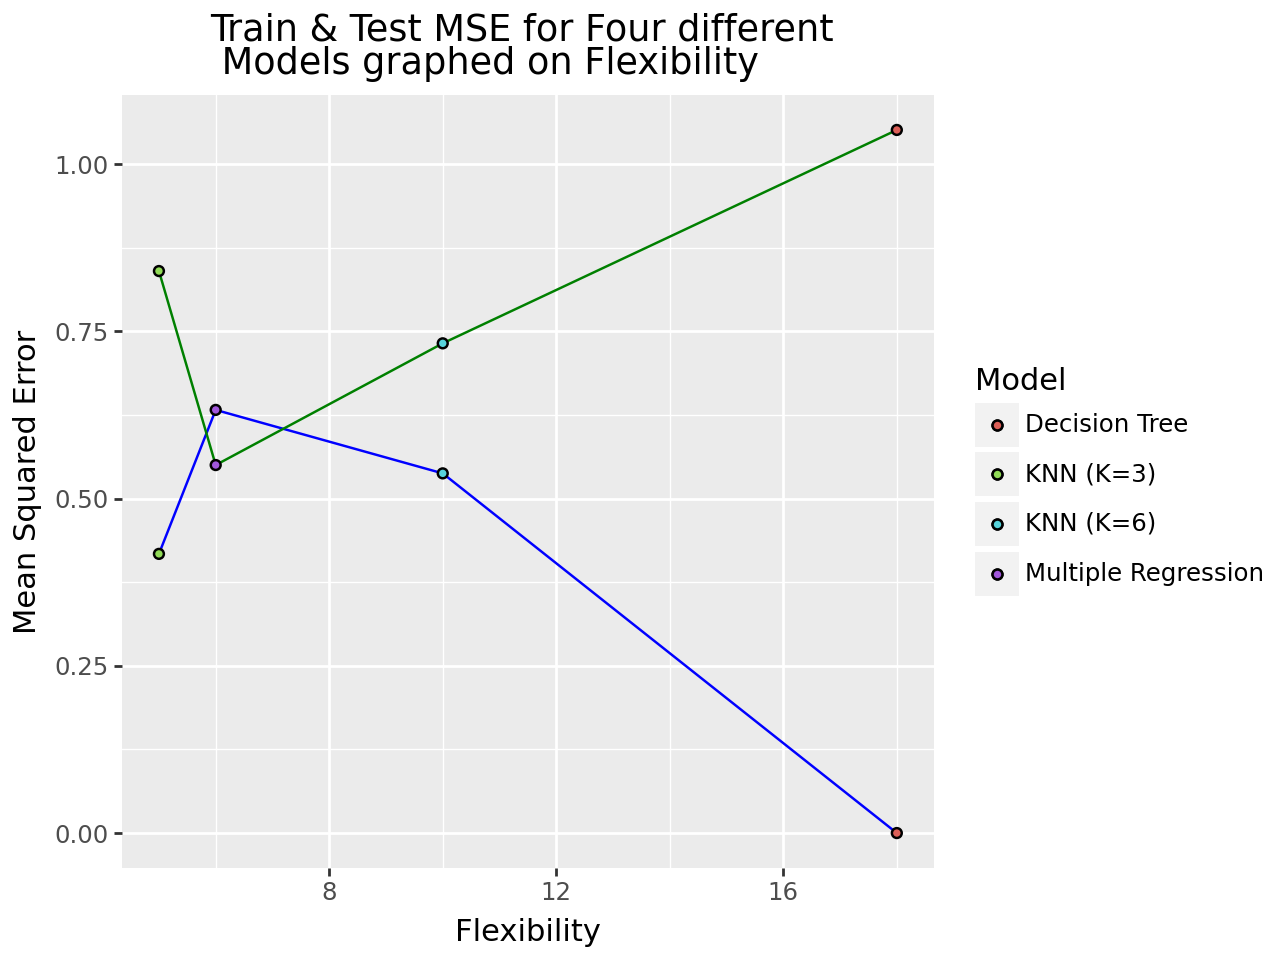

In [23]:
(pt.ggplot(fit_results, pt.aes(x="Flexibility"))
 +pt.geom_line(pt.aes(y="Train MSE"),color = "blue")
 +pt.geom_line(pt.aes(y="Test MSE"), color = "green")
 +pt.geom_point(pt.aes(y="Test MSE", fill="Model"))
 +pt.geom_point(pt.aes(y="Train MSE", fill="Model"))
 +pt.labs(title="Train & Test MSE for Four different \n Models graphed on Flexibility",
          y = "Mean Squared Error")
 )

The plot shows that multiple linear regression emerged as the best-performing model in terms of test Mean Squared Error (MSE). While it exhibited the highest train MSE among the models, it avoided overfitting and achieved the lowest test MSE, demonstrating its effectiveness. The K-Nearest Neighbors (KNN) models followed, performing reasonably well but not as effectively as multiple linear regression. In contrast, the Decision Tree model significantly overfit the data, leading to poor predictive performance on the test set.

The graph visually represents the relationship between model flexibility and MSE, with blue lines denoting train MSE and green lines denoting test MSE, providing a clear comparison across the four models.